In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [2]:
# 데이터 로드
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [3]:
# 데이터 정규화 & 원-핫 인코딩
X = X / 16.0   # 픽셀값(0~16)을 0~1 범위로 스케일링
y = to_categorical(y, num_classes=10)

In [4]:
# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [5]:
# 모델 정의
model = Sequential([
    Dense(128, activation='relu', input_shape=(64,)),   # 입력층: 8x8 = 64차원
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')  # 출력층: 10 클래스
])

/Users/khyu2/miniconda3/envs/study/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-10-02 10:07:26.632009: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-10-02 10:07:26.632067: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2025-10-02 10:07:26.632073: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.66 GB
2025-10-02 10:07:26.632133: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-10-02 10:07:26.632147: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:

In [6]:
# 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# 학습
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9485 - loss: 0.1678 - val_accuracy: 0.9484 - val_loss: 0.2245
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9704 - loss: 0.1222 - val_accuracy: 0.9444 - val_loss: 0.2018
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9520 - loss: 0.1351 - val_accuracy: 0.9325 - val_loss: 0.2150
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9677 - loss: 0.0975 - val_accuracy: 0.9365 - val_loss: 0.2114
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9550 - loss: 0.1159 - val_accuracy: 0.9444 - val_loss: 0.1947
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9783 - loss: 0.0878 - val_accuracy: 0.9444 - val_loss: 0.2292
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9655 - loss: 0.1148 - val_accuracy: 0.9405 - val_loss: 0.1971
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9600 - loss: 0.1258 - val_accuracy: 0.9524 - v

In [9]:
# 평가
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"테스트 정확도: {acc:.4f}")

테스트 정확도: 0.9556


/Users/khyu2/miniconda3/envs/study/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/khyu2/miniconda3/envs/study/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/khyu2/miniconda3/envs/study/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/khyu2/miniconda3/envs/study/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48296 (\N{HANGUL SYLLABLE BEL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


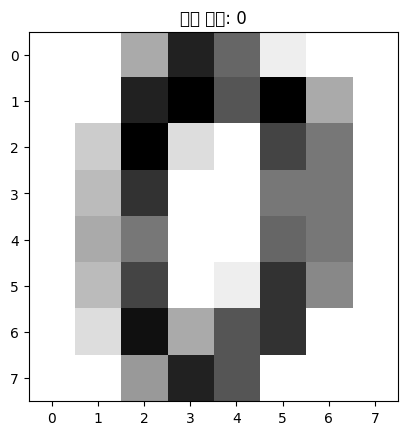

In [10]:
# 첫 번째 이미지 예측 확인
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')
plt.title(f"실제 라벨: {digits.target[0]}")
plt.show()


In [11]:
pred = model.predict(X[0].reshape(1, -1))
print("예측 결과:", pred.argmax())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step
예측 결과: 0
